# Task 3

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
## Depending on the permissions that you provided to your bucket you might need to provide your aws credentials
## to read from the bucket, if so provide with your credentials and pass as storage_options=aws_credentials
# aws_credentials = {"key": "","secret": "","token":""}
s3_bucket = "s3://mds-s3-22/"
input_file = out_file = os.path.join(s3_bucket, "output", "ml_data_SYD.csv")

# 1. Read the data CSV from your s3 bucket. 
df = pd.read_csv(input_file, index_col=0, parse_dates=True)

In [3]:
# 2. Drop rows with nans.
df = df.dropna()

# 3. Split the data into train (80%) and test (20%) portions with `random_state=123`.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)


In [4]:
# 4. Carry out EDA of your choice on the train split

# Describe the data
train_df.describe().T.round(3)



,count,mean,std,min,25%,50%,75%,max
ACCESS-CM2,36791.0,2.429,6.791,0.0,0.054,0.193,1.445,149.968
ACCESS-ESM1-5,36791.0,2.939,7.049,0.0,0.021,0.493,2.399,157.606
AWI-ESM-1-1-LR,36791.0,3.716,7.281,0.0,0.030,0.592,3.602,89.466
BCC-CSM2-MR,36791.0,2.203,6.518,0.0,0.001,0.096,1.319,134.465
BCC-ESM1,36791.0,2.748,5.997,0.0,0.002,0.299,2.478,87.135
CMCC-CM2-HR4,36791.0,3.093,6.459,0.0,0.138,0.634,3.183,124.952
CMCC-CM2-SR5,36791.0,3.575,7.353,-0.0,0.089,0.828,3.728,140.148
CMCC-ESM2,36791.0,3.490,7.039,-0.0,0.093,0.849,3.630,137.592
CanESM5,36791.0,2.879,6.899,0.0,0.022,0.338,2.559,135.570
EC-Earth3-Veg-LR,36791.0,2.565,5.733,-0.0,0.012,0.430,2.296,96.424


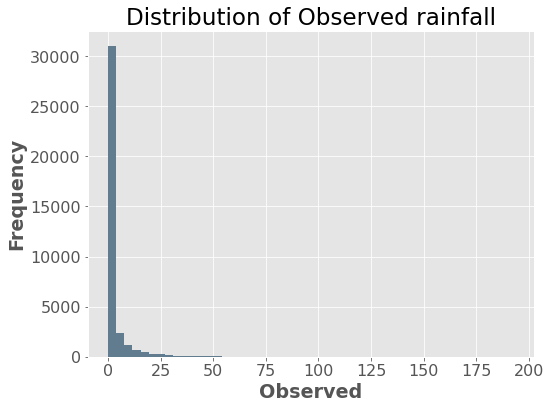

In [5]:

# Distribution of the target variable "Observed"
train_df['observed'].hist(bins=50, color='#607c8e')
plt.title('Distribution of Observed rainfall')
plt.xlabel('Observed')
plt.ylabel('Frequency')
plt.show()


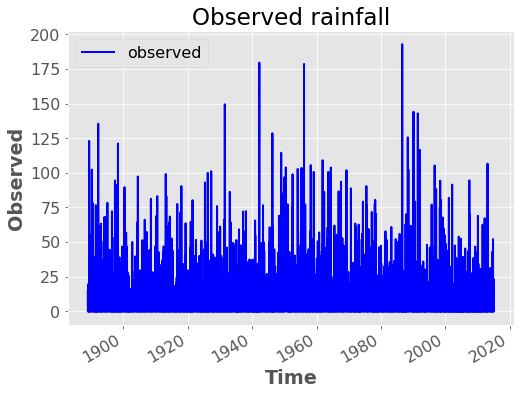

In [6]:
# plot time vs observed
train_df.plot(y="observed", title="Observed rainfall", color="blue", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Observed")
plt.show()


In [7]:
# 5. Train ensemble machine learning model using `RandomForestRegressor` 
# and evaluate with metric of your choice (e.g., `RMSE`) 
# by considering `Observed` as the target column.

# split X and y
X_train = train_df.drop(columns=['observed'])
y_train = train_df['observed']
X_test = test_df.drop(columns=['observed'])
y_test = test_df['observed']

# train the model using the training data set and RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=123)
model.fit(X_train, y_train)

# evaluate the model using the test data set
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
mae = mean_absolute_error(y_test, model.predict(X_test))
r2 = model.score(X_test, y_test)

# display the results
pd.DataFrame(
    {"rmse": [rmse], "mae": [mae], "r2": [r2]},
)


,rmse,mae,r2
0,8.860048,4.455497,-0.05749


In [8]:
# 6. Discuss your results. 
# Are you getting better results with ensemble models 
# compared to the individual climate models? 

# calculate rmse for each model 
# and compare the rmse of the ensemble model with the individual models

X_train.apply(lambda x: np.sqrt(mean_squared_error(y_train, x)), axis=0)




ACCESS-CM2          10.567243
ACCESS-ESM1-5       10.643536
AWI-ESM-1-1-LR      10.876956
BCC-CSM2-MR         10.294775
BCC-ESM1            10.071200
CMCC-CM2-HR4        10.353439
CMCC-CM2-SR5        10.935517
CMCC-ESM2           10.713240
CanESM5             10.571301
EC-Earth3-Veg-LR     9.902149
FGOALS-g3            9.284867
GFDL-CM4             9.889638
INM-CM4-8           11.088450
INM-CM5-0           11.624718
KIOST-ESM            9.196532
MIROC6              11.235601
MPI-ESM-1-2-HAM     10.615042
MPI-ESM1-2-HR        9.489925
MPI-ESM1-2-LR        9.681899
MRI-ESM2-0           9.609047
NESM3                9.371897
NorESM2-LM           9.918216
NorESM2-MM          10.683340
SAM0-UNICON         11.318714
TaiESM1             11.008567
dtype: float64

In [9]:
X_test.apply(lambda x: np.sqrt(mean_squared_error(y_test, x)), axis=0)


ACCESS-CM2          11.038999
ACCESS-ESM1-5       10.695305
AWI-ESM-1-1-LR      10.996616
BCC-CSM2-MR         10.761381
BCC-ESM1            10.615578
CMCC-CM2-HR4        10.643204
CMCC-CM2-SR5        11.480614
CMCC-ESM2           11.246493
CanESM5             11.151318
EC-Earth3-Veg-LR    10.453606
FGOALS-g3            9.687788
GFDL-CM4            10.511682
INM-CM4-8           11.451635
INM-CM5-0           12.250223
KIOST-ESM            9.600480
MIROC6              11.352976
MPI-ESM-1-2-HAM     10.932004
MPI-ESM1-2-HR        9.969823
MPI-ESM1-2-LR       10.260886
MRI-ESM2-0           9.922795
NESM3                9.978137
NorESM2-LM          10.410145
NorESM2-MM          10.939740
SAM0-UNICON         11.678749
TaiESM1             11.528083
dtype: float64

Yes, our model outperforms in terms of RMSE score. With our model, we obtained an RMSE score of 8.86, which is higher than all other models tested on train and test data.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [10]:
model = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=123)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=100, random_state=123)

In [11]:
print(
    f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}"
)
print(
    f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}"
)


Train RMSE: 3.11
 Test RMSE: 8.86


In [12]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***

In [13]:
# dump the model to s3 bucket
os.system(f"aws s3 cp model.joblib s3://mds-s3-22/output/model.joblib")

upload: ./model.joblib to s3://mds-s3-22/output/model.joblib        


0

In [14]:
# list the contents of the bucket to check if the model is uploaded
os.system(f"aws s3 ls s3://mds-s3-22/output")

                           PRE output/


0

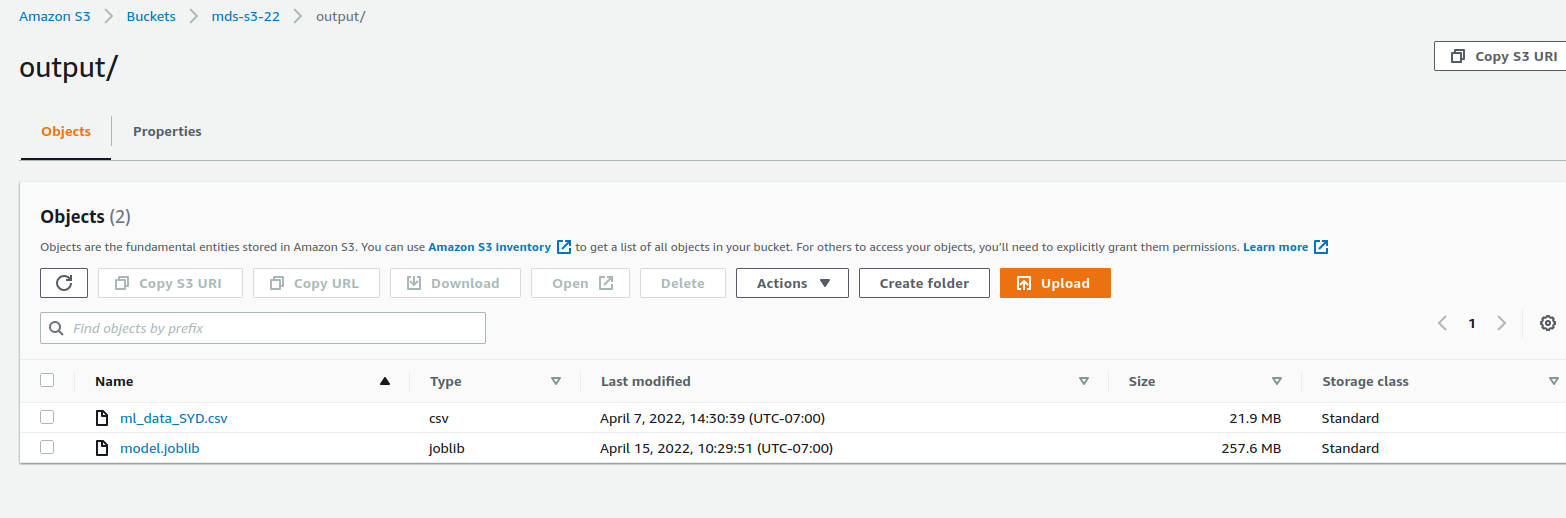

In [15]:
# Display the image of s3 bucket
from IPython.display import display, Image
display(Image(filename="../screenshots/s3_bucket_model.png"))